# Uniform quantization in frequency domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from skimage.util import img_as_ubyte
import matplotlib.image as mpimg

In [2]:
# loading image
img = img_as_ubyte(mpimg.imread('super_mario_head.png'))
choosen_y_x = 90
resolution = 128

img_slice = img[choosen_y_x:(choosen_y_x + resolution), choosen_y_x:(choosen_y_x + resolution), 2]

# Distribution: Frequency vs Spatial

<BarContainer object of 99 artists>

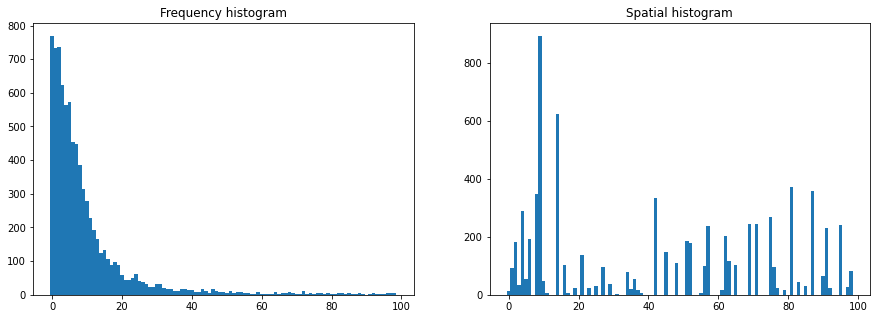

In [3]:
# transform: 2D DCT
dct_slice = fftpack.dct(fftpack.dct(img_slice.T, norm='ortho').T, norm='ortho')

dct_hist, dct_bin_edges = np.histogram(dct_slice, bins = range(100))
img_hist, img_bin_edges = np.histogram(img_slice, bins = range(100))

f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 5))

plt1.set_title('Frequency histogram')
plt1.bar(dct_bin_edges[:-1], dct_hist, width = 1)

plt2.set_title('Spatial histogram')
plt2.bar(img_bin_edges[:-1], img_hist, width = 1)

# Quantize by dividing and requantize by multyplying

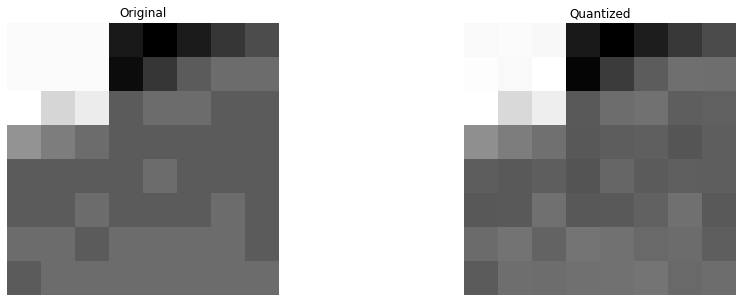

In [4]:
block = img_slice[80:88, 40:48]

quantize_step = 5

dct_slice = fftpack.dct(fftpack.dct(block.T, norm='ortho').T, norm='ortho')

dct_slice_quantized = np.divide(dct_slice,[quantize_step])
rounded_quantized = np.around(dct_slice_quantized)

dct_slice_requantized = np.multiply(rounded_quantized,[quantize_step])

idct_slice = fftpack.idct(fftpack.idct(dct_slice_requantized.T, norm='ortho').T, norm='ortho')


f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 5))

plt1.axis('off');
plt1.set_title('Original')
plt1.imshow(block, cmap='gray',interpolation='nearest')

plt2.axis('off');
plt2.set_title('Quantized')
plt2.imshow(idct_slice, cmap='gray',interpolation='nearest')

# DCT Coefficients

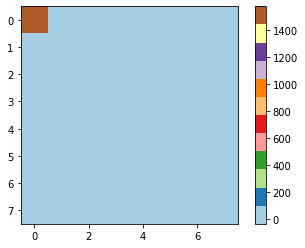

In [5]:
plt.imshow(dct_slice, interpolation='nearest', cmap=plt.cm.Paired)
plt.colorbar(shrink=1)

# Discarding based on coefficient importance

In [6]:
# a 8x8 block
block = img_slice[80:88, 40:48]

# a 2D DCT
dct_slice = fftpack.dct(fftpack.dct(block.T, norm='ortho').T, norm='ortho')

original_dct_slice = np.copy(dct_slice)

# keeps only the top left 5 element triangle
for u in range(8):
    for v in range(8):
        if (u + v) > 5:
            dct_slice[u, v] = 0

print("It compressed ", 100 - ((np.count_nonzero(dct_slice)/64) * 100), "% of the block.")

It compressed  67.1875 % of the block.


## Pixel Original

In [7]:
np.set_printoptions(precision=1, linewidth=140, suppress=True)
block

array([[253, 253, 253, 161, 151, 162, 173, 182],
       [253, 253, 253, 156, 173, 188, 195, 195],
       [255, 238, 247, 188, 195, 195, 188, 188],
       [211, 202, 195, 188, 188, 188, 188, 188],
       [188, 188, 188, 188, 195, 188, 188, 188],
       [188, 188, 195, 188, 188, 188, 195, 188],
       [195, 195, 188, 195, 195, 195, 195, 188],
       [188, 195, 195, 195, 195, 195, 195, 195]], dtype=uint8)

## DCT Original

In [8]:
original_dct_slice

array([[1578. ,   87. ,   50.7,   -9.7,  -32.5,   -8. ,   18. ,   23.6],
       [  42.3,   96.9,   63. ,  -16.5,  -34.5,  -10.1,   25.2,   23.6],
       [  13.4,   34.3,   27.4,  -16.1,  -21.8,   -5. ,    7.2,    5.7],
       [ -33.1,   -4.9,    3.9,   -9.9,   -3.6,    2.5,   -4.1,   -0.7],
       [ -28. ,   -9.8,   -5.2,   -5.7,    9.5,    0.1,   -6. ,   -8.3],
       [  -5.9,    8.9,   -2.6,    2.4,    9.2,    6.3,   -3.4,   -7.9],
       [   5.5,   12. ,   -4.8,   -7.2,    1.7,    4.5,    5.1,    2.3],
       [   8.9,    9.5,   -7.3,    1.5,    4.8,   -1.3,    1.8,    0.7]])

## Quantized

In [9]:
dct_slice

array([[1578. ,   87. ,   50.7,   -9.7,  -32.5,   -8. ,    0. ,    0. ],
       [  42.3,   96.9,   63. ,  -16.5,  -34.5,    0. ,    0. ,    0. ],
       [  13.4,   34.3,   27.4,  -16.1,    0. ,    0. ,    0. ,    0. ],
       [ -33.1,   -4.9,    3.9,    0. ,    0. ,    0. ,    0. ,    0. ],
       [ -28. ,   -9.8,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ],
       [  -5.9,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ]])

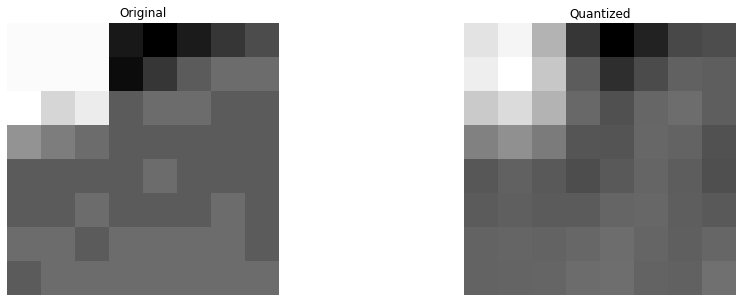

In [10]:
idct_slice = fftpack.idct(fftpack.idct(dct_slice.T, norm='ortho').T, norm='ortho')


f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 5))

plt1.axis('off');
plt1.set_title('Original')
plt1.imshow(block, cmap='gray', interpolation='nearest')

plt2.axis('off');
plt2.set_title('Quantized')
plt2.imshow(idct_slice, cmap='gray', interpolation='nearest')